## Project CORD-19 - PySpark RDD - Big Data Tools & Techniques

### 0. Module setup / Library installations

In [0]:
# Install bokeh library for Data Visualization
%pip install bokeh

Python interpreter will be restarted.
Processing /root/.cache/pip/wheels/1b/a5/90/f38b6cd80a8276a7203765295ad3da078aa24ff8006096ae49/bokeh-2.3.2-py3-none-any.whl
Requirement already satisfied: numpy>=1.11.3 in /databricks/python3/lib/python3.8/site-packages (from bokeh) (1.19.2)
Collecting typing-extensions>=3.7.4
 Using cached typing_extensions-3.10.0.0-py3-none-any.whl (26 kB)
Collecting Jinja2>=2.9
 Using cached Jinja2-3.0.0-py3-none-any.whl (133 kB)
Collecting PyYAML>=3.10
 Using cached PyYAML-5.4.1-cp38-cp38-manylinux1_x86_64.whl (662 kB)
Collecting pillow>=7.1.0
 Using cached Pillow-8.2.0-cp38-cp38-manylinux1_x86_64.whl (3.0 MB)
Requirement already satisfied: tornado>=5.1 in /databricks/python3/lib/python3.8/site-packages (from bokeh) (6.0.4)
Collecting packaging>=16.8
 Using cached packaging-20.9-py2.py3-none-any.whl (40 kB)
Requirement already satisfied: python-dateutil>=2.1 in /databricks/python3/lib/python3.8/site-packages (from bokeh) (2.8.1)
Collecting MarkupSafe>=2.0.0rc2
 Using cached MarkupSafe-2.0.0-cp38-cp38-manylinux2010_x86_64.whl (30 kB)
Requirement already satisfied: pyparsing>=2.0.2 in /databricks/python3/lib/python3.8/site-packages (from packaging>=16.8->bokeh) (2.4.7)
Requirement already satisfied: six>=1.5 in /usr/local/lib/python3.8/site-packages (from python-dateutil>=2.1->bokeh) (1.15.0)
Installing collected packages: typing-extensions, MarkupSafe, Jinja2, PyYAML, pillow, packaging, bokeh
Successfully installed Jinja2-3.0.0 MarkupSafe-2.0.0 PyYAML-5.4.1 bokeh-2.3.2 packaging-20.9 pillow-8.2.0 typing-extensions-3.10.0.0
WARNING: You are using pip version 20.2.4; however, version 21.1.1 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-bc10a1b6-2320-49c8-bb5f-361f421234ea/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.

In [0]:
# Install wordcloud library for Data Visualization
%pip install wordcloud

Python interpreter will be restarted.
Collecting wordcloud
 Using cached wordcloud-1.8.1-cp38-cp38-manylinux1_x86_64.whl (371 kB)
Requirement already satisfied: numpy>=1.6.1 in /databricks/python3/lib/python3.8/site-packages (from wordcloud) (1.19.2)
Requirement already satisfied: matplotlib in /databricks/python3/lib/python3.8/site-packages (from wordcloud) (3.2.2)
Requirement already satisfied: pillow in /local_disk0/.ephemeral_nfs/envs/pythonEnv-bc10a1b6-2320-49c8-bb5f-361f421234ea/lib/python3.8/site-packages (from wordcloud) (8.2.0)
Requirement already satisfied: kiwisolver>=1.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (1.3.0)
Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (2.4.7)
Requirement already satisfied: cycler>=0.10 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (0.10.0)
Requirement already satisfied: python-dateutil>=2.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib->wordcloud) (2.8.1)
Requirement already satisfied: six in /usr/local/lib/python3.8/site-packages (from cycler>=0.10->matplotlib->wordcloud) (1.15.0)
Installing collected packages: wordcloud
Successfully installed wordcloud-1.8.1
WARNING: You are using pip version 20.2.4; however, version 21.1.1 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-bc10a1b6-2320-49c8-bb5f-361f421234ea/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.

### 1. Setting the stage

#### 1.1 Create widgets to pick the necessary files from the data sources

In [0]:
# Choose Year
dbutils.widgets.dropdown("Step 1 - Choose Year", "2020", [str(x) for x in range(2019, 2026)])

# Choose Month
dbutils.widgets.dropdown("Step 2 - Choose Month", "07", [str(x).zfill(2) for x in range(1, 13)])

# Choose Date
dbutils.widgets.dropdown("Step 3 - Choose Date", "01", [str(x).zfill(2) for x in range(1, 32)])

# Choose ScimagoJr Year
dbutils.widgets.dropdown("Step 4 - Choose SJR Year", "2019", [str(x) for x in range(2019, 2021)])

print("Widgets created successfully: ", "\n")
print("CORD-19 Dataset : ")
print("  Year : ", dbutils.widgets.get("Step 1 - Choose Year"))
print("  Month: ", dbutils.widgets.get("Step 2 - Choose Month"))
print("  Date : ", dbutils.widgets.get("Step 3 - Choose Date"), "\n")
print("Scimago Dataset : ")
print("  SJR Year: ", dbutils.widgets.get("Step 4 - Choose SJR Year"))

Widgets created successfully: 

CORD-19 Dataset : 
 Year : 2020
 Month: 07
 Date : 01 

Scimago Dataset : 
 SJR Year: 2019

#### 1.2 Create the necessary variables from User inputs through Widgets

In [0]:
#Main FilePath
filepath = "dbfs:/FileStore/tables/CORD19/"

#####################################
# CORD-19 dataset 
#####################################

# Fragments of the URL from where we will download the dataset from: 
url_frag1 = "https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/"
url_frag2 = dbutils.widgets.get("Step 1 - Choose Year") + "-" + dbutils.widgets.get("Step 2 - Choose Month") + "-" + dbutils.widgets.get("Step 3 - Choose Date")
url_frag3 = "/metadata.csv"

# Combined variable using all the fragments of the URL
metadata_url = url_frag1 + url_frag2 + url_frag3

# Proper filename given to store the data
md_filename = str("metadata_" + url_frag2 + ".csv").replace("-","_")

# Display status :
print("Dataset name : CORD-19") 
print("Dataset type : Web-based '.CSV' file (URL)")
print("URL location :", str(metadata_url).strip(), "\n")

#####################################
# Scimago Journal Rankings dataset 
#####################################

# Instead of manual Import, we uploaded the file into GitHub to use the URL here directly
# Data Source - https://www.scimagojr.com/journalrank.php?page=1&total_size=30891
# GitHub source - https://raw.githubusercontent.com/ambareesh-j/SJR/main/scimagojr%202019.csv

#Fragments of the location of the downloaded/imported file of SJR URL:
sjr_frag1 = "https://raw.githubusercontent.com/ambareesh-j/SJR/main/scimagojr%20"
sjr_frag2 = dbutils.widgets.get("Step 4 - Choose SJR Year") + ".csv"

# Combined variable using all the fragments of the file location of SJR URL
scimago_loc = sjr_frag1 + sjr_frag2

# Proper filename given to store the data
sjr_filename = str("scimagojr_" + sjr_frag2)

# Extra variables (during visualization)
scimago_year = dbutils.widgets.get("Step 4 - Choose SJR Year")

# Display status :
print("Dataset name : Scimago Journal Rankings") 
print("Dataset type : Web-based '.CSV' file (URL)")
print("URL location: ", str(scimago_loc).strip())

Dataset name : CORD-19
Dataset type : Web-based '.CSV' file (URL)
URL location : https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/2020-07-01/metadata.csv 

Dataset name : Scimago Journal Rankings
Dataset type : Web-based '.CSV' file (URL)
URL location: https://raw.githubusercontent.com/ambareesh-j/SJR/main/scimagojr%202019.csv

#### 1.3 Quality Check for Website domain presence

##### 1.3.1 CORD19 dataset - Quality check

In [0]:
import requests
request = requests.get(metadata_url)
if request.status_code == 200:
    print('Validation complete, Website exists : ', metadata_url )
else:
    raise NameError('Validation failed: Website does not exist (or) Input Year/Month/Date is invalid')

Validation complete, Website exists : https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/2020-07-01/metadata.csv

##### 1.3.2 ScimagoJr dataset - Quality check

In [0]:
import requests
request = requests.get(scimago_loc)
if request.status_code == 200:
    print('Validation complete, Website exists : ', scimago_loc )
else:
    raise NameError('Validation failed: Website does not exist (or) Input Year ScimagoJr is invalid')

Validation complete, Website exists : https://raw.githubusercontent.com/ambareesh-j/SJR/main/scimagojr%202019.csv

### 2. Data Preparation & Scrubbing

#### 2.1 Validate the Underlying implementation

In [0]:
# Validate the underlying implementation using imp module in Python
import imp

try:
    imp.find_module('dbutils')
except ImportError:
    import pyspark
    sc = pyspark.SparkContext() 
    
print("Validation complete : Underlying implementation using Databricks")

<command-1747154801707684>:2: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
 import imp
Validation complete : Underlying implementation using Databricks

#### 2.2 Download the datasets from URLs and store in Databricks

##### 2.2.1 Setup environmental variables to work using Shell script

In [0]:
import os

os.environ['fileurl'] = metadata_url
os.environ['fileroot'] = md_filename

os.environ['fileurl2'] = scimago_loc
os.environ['fileroot2'] = sjr_filename

##### 2.2.2 Download the file from the URL using path variables and store it in File:/tmp/ folder

In [0]:
%sh

rm /tmp/$fileroot
curl $fileurl > /tmp/$fileroot

% Total % Received % Xferd Average Speed Time Time Time Current
 Dload Upload Total Spent Left Speed

 0 0 0 0 0 0 0 0 --:--:-- --:--:-- --:--:-- 0
 6 231M 6 16.1M 0 0 27.4M 0 0:00:08 --:--:-- 0:00:08 27.3M
 14 231M 14 33.0M 0 0 21.2M 0 0:00:10 0:00:01 0:00:09 21.1M
 20 231M 20 48.1M 0 0 18.7M 0 0:00:12 0:00:02 0:00:10 18.7M
 25 231M 25 59.6M 0 0 16.6M 0 0:00:13 0:00:03 0:00:10 16.6M
 39 231M 39 91.1M 0 0 19.9M 0 0:00:11 0:00:04 0:00:07 19.9M
 57 231M 57 133M 0 0 23.9M 0 0:00:09 0:00:05 0:00:04 23.5M
 86 231M 86 200M 0 0 30.6M 0 0:00:07 0:00:06 0:00:01 33.5M
 99 231M 99 231M 0 0 30.5M 0 0:00:07 0:00:07 --:--:-- 36.6M
100 231M 100 231M 0 0 30.5M 0 0:00:07 0:00:07 --:--:-- 42.8M

In [0]:
%sh

rm /tmp/$fileroot2
curl $fileurl2 > /tmp/$fileroot2

% Total % Received % Xferd Average Speed Time Time Time Current
 Dload Upload Total Spent Left Speed

 0 0 0 0 0 0 0 0 --:--:-- --:--:-- --:--:-- 0
 9 7979k 9 765k 0 0 1939k 0 0:00:04 --:--:-- 0:00:04 1934k
100 7979k 100 7979k 0 0 10.5M 0 --:--:-- --:--:-- --:--:-- 10.5M

##### 2.2.3 Copy the files from File:/ directory to DBFS:/ directory to enable utility

In [0]:
# Copy the files to DBFS:/
dbutils.fs.cp("file:/tmp/"+md_filename, filepath+md_filename)
dbutils.fs.cp("file:/tmp/"+sjr_filename, filepath+sjr_filename)

# Find the files in DBFS:/ path
dbutils.fs.ls(filepath)

Out[9]: [FileInfo(path='dbfs:/FileStore/tables/CORD19/CountryKeys/', name='CountryKeys/', size=0),
 FileInfo(path='dbfs:/FileStore/tables/CORD19/metadata_2020_03_27.csv', name='metadata_2020_03_27.csv', size=69689204),
 FileInfo(path='dbfs:/FileStore/tables/CORD19/metadata_2020_05_01.csv', name='metadata_2020_05_01.csv', size=89290114),
 FileInfo(path='dbfs:/FileStore/tables/CORD19/metadata_2020_07_01.csv', name='metadata_2020_07_01.csv', size=242867644),
 FileInfo(path='dbfs:/FileStore/tables/CORD19/parq/', name='parq/', size=0),
 FileInfo(path='dbfs:/FileStore/tables/CORD19/prd', name='prd', size=242867644),
 FileInfo(path='dbfs:/FileStore/tables/CORD19/scimagojr_2019.csv', name='scimagojr_2019.csv', size=8170647)]

#### 2.3 Validate the datasets extracted/imported into DBFS

In [0]:
# Check if this file is present in /FileStore/tables/CORD19/

# Custom function to see if the file exists in a given path
def file_exists(path):
    try:
        dbutils.fs.ls(path)
        return True
    except Exception as e:
        if 'java.io.FileNotFoundException' in str(e):
            return False
        else:
            raise

####################
# CORD19 Dataset 
####################
try:
    imp.find_module('dbutils')     
    assert file_exists(filepath+md_filename) == True, "ERROR - The .CSV file was not correctly uploaded for CORD19 metadata - " + md_filename + ", please check again and upload into /FileStore/tables/CORD19/"
except ImportError:
    print("Are you running this on Databricks?")
    
print("Validation complete, File exists in Databricks :", filepath+md_filename)

####################
# ScimagoJr Dataset
####################
try:
    imp.find_module('dbutils')     
    assert file_exists(filepath+sjr_filename) == True, "ERROR - The .CSV file was not correctly uploaded for Scimago Journal Rankings - " + sjr_filename + ", please check again and upload into /FileStore/tables/CORD19/"
except ImportError:
    print("Are you running this on Databricks?")
    
print("Validation complete, File exists in Databricks :", filepath+sjr_filename)

Validation complete, File exists in Databricks : dbfs:/FileStore/tables/CORD19/metadata_2020_07_01.csv
Validation complete, File exists in Databricks : dbfs:/FileStore/tables/CORD19/scimagojr_2019.csv

#### 2.4 Validate the underlying data

##### 2.4.1 CORD19 - Underlying data validation

In [0]:
# Temporary RDD created
tmp_cord_rdd = sc.textFile(filepath+md_filename)

# Assert if the number of records present are at least 2 - a header and a line item
assert tmp_cord_rdd.count() >= 2, "Validation failed: Missing data in the uploaded file, please recheck the URL used"

# Validation status - success message
print("Validation complete: There is at least 1 record in the RDD, so expecting successful transformation for the file :", "\n", filepath+md_filename)

# Delete the temporary RDD to conserve memory
del tmp_cord_rdd

Validation complete: There is at least 1 record in the RDD, so expecting successful transformation for the file : 
 dbfs:/FileStore/tables/CORD19/metadata_2020_07_01.csv

##### 2.4.2 ScimagoJr - Underlying data validation

In [0]:
# Temporary RDD created
tmp_scimago_rdd = sc.textFile(filepath+sjr_filename)

# Validate if the number of records present are at least 2 - a header and a line item
assert tmp_scimago_rdd.count() >= 2, "Validation failed: Missing data in the uploaded file, please recheck the URL used"

# Validation status - success message
print("Validation complete: There is at least 1 record in the RDD, so expecting successful transformation for the file :", "\n", filepath+sjr_filename)

# Delete the temporary RDD to conserve memory
del tmp_scimago_rdd

Validation complete: There is at least 1 record in the RDD, so expecting successful transformation for the file : 
 dbfs:/FileStore/tables/CORD19/scimagojr_2019.csv

#### 2.5 Create Resilient Distributed Datasets(RDD) from Dataframes(DF)

##### 2.5.1 CORD19 - Create Dataframe --> df_cord

No schema defined, because the columns can vary in the future

In [0]:
# File location and type
file_location = filepath+md_filename
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df_cord = spark.read.format(file_type) \
               .option("inferSchema", infer_schema) \
               .option("header", first_row_is_header) \
               .option("quote", "\"") \
               .option("escape", "\"") \
               .option("sep", delimiter) \
               .load(file_location)

# Dataframe df_cord displayed
df_cord.printSchema()
display(df_cord)

root
-- cord_uid: string (nullable = true)
-- sha: string (nullable = true)
-- source_x: string (nullable = true)
-- title: string (nullable = true)
-- doi: string (nullable = true)
-- pmcid: string (nullable = true)
-- pubmed_id: string (nullable = true)
-- license: string (nullable = true)
-- abstract: string (nullable = true)
-- publish_time: string (nullable = true)
-- authors: string (nullable = true)
-- journal: string (nullable = true)
-- mag_id: string (nullable = true)
-- who_covidence_id: string (nullable = true)
-- arxiv_id: string (nullable = true)
-- pdf_json_files: string (nullable = true)
-- pmc_json_files: string (nullable = true)
-- url: string (nullable = true)
-- s2_id: integer (nullable = true)

cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,"Clinical features of culture-proven Mycoplasma pneumoniae infections at King Abdulaziz University Hospital, Jeddah, Saudi Arabia",10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,"OBJECTIVE: This retrospective chart review describes the epidemiology and clinical features of 40 patients with culture-proven Mycoplasma pneumoniae infections at King Abdulaziz University Hospital, Jeddah, Saudi Arabia. METHODS: Patients with positive M. pneumoniae cultures from respiratory specimens from January 1997 through December 1998 were identified through the Microbiology records. Charts of patients were reviewed. RESULTS: 40 patients were identified, 33 (82.5%) of whom required admission. Most infections (92.5%) were community-acquired. The infection affected all age groups but was most common in infants (32.5%) and pre-school children (22.5%). It occurred year-round but was most common in the fall (35%) and spring (30%). More than three-quarters of patients (77.5%) had comorbidities. Twenty-four isolates (60%) were associated with pneumonia, 14 (35%) with upper respiratory tract infections, and 2 (5%) with bronchiolitis. Cough (82.5%), fever (75%), and malaise (58.8%) were the most common symptoms, and crepitations (60%), and wheezes (40%) were the most common signs. Most patients with pneumonia had crepitations (79.2%) but only 25% had bronchial breathing. Immunocompromised patients were more likely than non-immunocompromised patients to present with pneumonia (8/9 versus 16/31, P = 0.05). Of the 24 patients with pneumonia, 14 (58.3%) had uneventful recovery, 4 (16.7%) recovered following some complications, 3 (12.5%) died because of M pneumoniae infection, and 3 (12.5%) died due to underlying comorbidities. The 3 patients who died of M pneumoniae pneumonia had other comorbidities. CONCLUSION: our results were similar to published data except for the finding that infections were more common in infants and preschool children and that the mortality rate of pneumonia in patients with comorbidities was high.",2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,null,null,null,document_parses/pdf_json/d1aafb70c066a2068b02786f8929fd9c900897fb.json,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC35282/,null
02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in lung disease?,10.1186/rr14,PMC59543,11667967,no-cc,"Inflammatory diseases of the respiratory tract are commonly associated with elevated production of nitric oxide (NO•) and increased indices of NO• -dependent oxidative stress. Although NO• is known to have anti-microbial, anti-inflammatory and anti-oxidant properties, various lines of evidence support the contribution of NO• to lung injury in several disease models. On the basis of biochemical evidence, it is often presumed that such NO• -dependent oxidations are due to the formation of the oxidant peroxynitrite, although alternative mechanisms involving the phagocyte-derived heme proteins myeloperoxidase and eosinophil peroxidase might be operative during conditions of inflammation. Because of the overwhelming literature on NO• generation and activities in the respiratory tract, it would be beyond the scope of this commentary to review this area comprehensively. Instead, it focuses on recent evidence and concepts of the presumed contribution of NO• to inflammatory diseases of the lung.",2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cross, Carroll E",Respir Res,null,null,null,document_parses/pdf_json/6b0567729c2143a66d737eb0a2f63f2dce2e5a7d.json,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC59543/,null
ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and 

###### 2.5.1.2 CORD19 - Create RDD from Dataframe --> cord19_rdd

In [0]:
# RDD Creation from the DF.rdd method
cord19_rdd = df_cord.rdd
cord19_rdd.take(10)

Out[14]: [Row(cord_uid='ug7v899j', sha='d1aafb70c066a2068b02786f8929fd9c900897fb', source_x='PMC', title='Clinical features of culture-proven Mycoplasma pneumoniae infections at King Abdulaziz University Hospital, Jeddah, Saudi Arabia', doi='10.1186/1471-2334-1-6', pmcid='PMC35282', pubmed_id='11472636', license='no-cc', abstract='OBJECTIVE: This retrospective chart review describes the epidemiology and clinical features of 40 patients with culture-proven Mycoplasma pneumoniae infections at King Abdulaziz University Hospital, Jeddah, Saudi Arabia. METHODS: Patients with positive M. pneumoniae cultures from respiratory specimens from January 1997 through December 1998 were identified through the Microbiology records. Charts of patients were reviewed. RESULTS: 40 patients were identified, 33 (82.5%) of whom required admission. Most infections (92.5%) were community-acquired. The infection affected all age groups but was most common in infants (32.5%) and pre-school children (22.5%). It occurred year-round but was most common in the fall (35%) and spring (30%). More than three-quarters of patients (77.5%) had comorbidities. Twenty-four isolates (60%) were associated with pneumonia, 14 (35%) with upper respiratory tract infections, and 2 (5%) with bronchiolitis. Cough (82.5%), fever (75%), and malaise (58.8%) were the most common symptoms, and crepitations (60%), and wheezes (40%) were the most common signs. Most patients with pneumonia had crepitations (79.2%) but only 25% had bronchial breathing. Immunocompromised patients were more likely than non-immunocompromised patients to present with pneumonia (8/9 versus 16/31, P = 0.05). Of the 24 patients with pneumonia, 14 (58.3%) had uneventful recovery, 4 (16.7%) recovered following some complications, 3 (12.5%) died because of M pneumoniae infection, and 3 (12.5%) died due to underlying comorbidities. The 3 patients who died of M pneumoniae pneumonia had other comorbidities. CONCLUSION: our results were similar to published data except for the finding that infections were more common in infants and preschool children and that the mortality rate of pneumonia in patients with comorbidities was high.', publish_time='2001-07-04', authors='Madani, Tariq A; Al-Ghamdi, Aisha A', journal='BMC Infect Dis', mag_id=None, who_covidence_id=None, arxiv_id=None, pdf_json_files='document_parses/pdf_json/d1aafb70c066a2068b02786f8929fd9c900897fb.json', pmc_json_files='document_parses/pmc_json/PMC35282.xml.json', url='https://www.ncbi.nlm.nih.gov/pmc/articles/PMC35282/', s2_id=None),
 Row(cord_uid='02tnwd4m', sha='6b0567729c2143a66d737eb0a2f63f2dce2e5a7d', source_x='PMC', title='Nitric oxide: a pro-inflammatory mediator in lung disease?', doi='10.1186/rr14', pmcid='PMC59543', pubmed_id='11667967', license='no-cc', abstract='Inflammatory diseases of the respiratory tract are commonly associated with elevated production of nitric oxide (NO•) and increased indices of NO• -dependent oxidative stress. Although NO• is known to have anti-microbial, anti-inflammatory and anti-oxidant properties, various lines of evidence support the contribution of NO• to lung injury in several disease models. On the basis of biochemical evidence, it is often presumed that such NO• -dependent oxidations are due to the formation of the oxidant peroxynitrite, although alternative mechanisms involving the phagocyte-derived heme proteins myeloperoxidase and eosinophil peroxidase might be operative during conditions of inflammation. Because of the overwhelming literature on NO• generation and activities in the respiratory tract, it would be beyond the scope of this commentary to review this area comprehensively. Instead, it focuses on recent evidence and concepts of the presumed contribution of NO• to inflammatory diseases of the lung.', publish_time='2000-08-15', authors='Vliet, Albert van der; Eiserich, Jason P; Cross, Carroll E', journal='Respir Res', mag_id=None, who_covidence_id=None, arxiv_id=None, pdf_json_files='document_

In [0]:
cord19_rdd.count()

Out[15]: 169821

##### 2.5.2 ScimagoJr - Create Dataframe --> df_scimagojr

Schema is defined, since the corresponding source file from https://www.scimagojr.com/journalrank.php always returns a fixed number of columns

In [0]:
from pyspark.sql.types import IntegerType, StringType, StructType, StructField

#Creating a Schema
scimagoSchema = StructType([ 
                          StructField("Rank", IntegerType(), False),
                          StructField("Sourceid", StringType(), True),
                          StructField("Title", StringType(), True),
                          StructField("Type", StringType(), True),
                          StructField("Issn", StringType(), True),
                          StructField("SJR", IntegerType(), True),
                          StructField("SJR_Best_Quartile", StringType(), True),
                          StructField("H_index", IntegerType(), True),
                          StructField("Total_Docs_"+scimago_year, IntegerType(), True ),
                          StructField("Total_Docs_3years", IntegerType(), True),
                          StructField("Total_Refs", IntegerType(), True ),
                          StructField("Total_Cites_3years", IntegerType(), True ),
                          StructField("Citable_Docs_3years", IntegerType(), True),
                          StructField("Cites/Doc_2years", IntegerType(), True ),
                          StructField("Ref/Doc", StringType(), True),
                          StructField("Country", StringType(), True),
                          StructField("Region", StringType(), True ),
                          StructField("Publisher", StringType(), True),
                          StructField("Coverage", StringType(), True),
                          StructField("Categories", StringType(), True),
                            ])

# File location and type
file_location = filepath+sjr_filename
file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ";"

# The applied options are for CSV files. For other file types, these will be ignored.
df_scimagojr = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .schema(scimagoSchema) \
  .load(file_location)

#   .option("schema", scimagoSchema) \
 
df_scimagojr.printSchema()
display(df_scimagojr)

root
-- Rank: integer (nullable = true)
-- Sourceid: string (nullable = true)
-- Title: string (nullable = true)
-- Type: string (nullable = true)
-- Issn: string (nullable = true)
-- SJR: integer (nullable = true)
-- SJR_Best_Quartile: string (nullable = true)
-- H_index: integer (nullable = true)
-- Total_Docs_2019: integer (nullable = true)
-- Total_Docs_3years: integer (nullable = true)
-- Total_Refs: integer (nullable = true)
-- Total_Cites_3years: integer (nullable = true)
-- Citable_Docs_3years: integer (nullable = true)
-- Cites/Doc_2years: integer (nullable = true)
-- Ref/Doc: string (nullable = true)
-- Country: string (nullable = true)
-- Region: string (nullable = true)
-- Publisher: string (nullable = true)
-- Coverage: string (nullable = true)
-- Categories: string (nullable = true)

Rank,Sourceid,Title,Type,Issn,SJR,SJR_Best_Quartile,H_index,Total_Docs_2019,Total_Docs_3years,Total_Refs,Total_Cites_3years,Citable_Docs_3years,Cites/Doc_2years,Ref/Doc,Country,Region,Publisher,Coverage,Categories
1,28773,CA - A Cancer Journal for Clinicians,journal,"15424863, 00079235",null,Q1,156,36,129,2924,22644,89,null,"81,22",United States,Northern America,Wiley-Blackwell,1950-2020,Hematology (Q1); Oncology (Q1)
2,19434,MMWR. Recommendations and reports : Morbidity and mortality weekly report. Recommendations and reports / Centers for Disease Control,journal,"10575987, 15458601",null,Q1,138,4,11,144,898,11,null,"36,00",United States,Northern America,Centers for Disease Control and Prevention (CDC),1990-2020,"Epidemiology (Q1); Health Information Management (Q1); Health (social science) (Q1); Health, Toxicology and Mutagenesis (Q1); Medicine (miscellaneous) (Q1)"
3,21100812243,Nature Reviews Materials,journal,20588437,null,Q1,80,85,288,8534,12569,151,null,"100,40",United Kingdom,Western Europe,Nature Publishing Group,2016-2020,"Biomaterials (Q1); Electronic, Optical and Magnetic Materials (Q1); Energy (miscellaneous) (Q1); Materials Chemistry (Q1); Surfaces, Coatings and Films (Q1)"
4,29431,Quarterly Journal of Economics,journal,"00335533, 15314650",null,Q1,246,30,123,1909,2020,119,null,"63,63",United Kingdom,Western Europe,Oxford University Press,1886-2020,Economics and Econometrics (Q1)
5,20315,Nature Reviews Molecular Cell Biology,journal,"14710072, 14710080",null,Q1,411,115,382,9251,8074,182,null,"80,44",United Kingdom,Western Europe,Nature Publishing Group,2000-2020,Cell Biology (Q1); Molecular Biology (Q1)
6,58530,"National vital statistics reports : from the Centers for Disease Control and Prevention, National Center for Health Statistics, National Vital Statistics System",book series,"15518922, 15518930",null,Q1,95,14,30,379,1059,30,null,"27,07",United States,Northern America,"Public Health Services, US Dept of Health and Human Services",1998-2020,Life-span and Life-course Studies (Q1)
7,18991,Nature Reviews Genetics,journal,"14710056, 14710064",null,Q1,345,113,376,8586,6416,154,null,"75,98",United Kingdom,Western Europe,Nature Publishing Group,2000-2020,Genetics (Q1); Genetics (clinical) (Q1); Molecular Biology (Q1)
8,18434,Cell,journal,"00928674, 10974172",null,Q1,747,581,1881,34924,49252,1630,null,"60,11",United States,Northern America,Cell Press,1974-2020,"Biochemistry, Genetics and Molecular Biology (miscellaneous) (Q1)"
9,29719,Reviews of Modern Physics,journal,"00346861, 15390756",null,Q1,316,40,131,11080,5583,121,null,"277,00",United States,Northern America,American Physical Society,1929-2019,Physics and Astronomy (miscellaneous) (Q1)
10,12464,Nature Reviews Cancer,journal,"1474175X, 14741768",null,Q1,418,138,366,7641,8532,204,null,"55,37",United Kingdom,Western Europe,Nature Publishing Group,2001-2020,Cancer Research (Q1); Oncology (Q1)


###### 2.5.2.2 ScimagoJr - Create RDD from Dataframe --> scimagojr_rdd

In [0]:
scimagojr_rdd = df_scimagojr.rdd
scimagojr_rdd.take(10)

Out[17]: [Row(Rank=1, Sourceid='28773', Title='CA - A Cancer Journal for Clinicians', Type='journal', Issn='15424863, 00079235', SJR=None, SJR_Best_Quartile='Q1', H_index=156, Total_Docs_2019=36, Total_Docs_3years=129, Total_Refs=2924, Total_Cites_3years=22644, Citable_Docs_3years=89, Cites/Doc_2years=None, Ref/Doc='81,22', Country='United States', Region='Northern America', Publisher='Wiley-Blackwell', Coverage='1950-2020', Categories='Hematology (Q1); Oncology (Q1)'),
 Row(Rank=2, Sourceid='19434', Title='MMWR. Recommendations and reports : Morbidity and mortality weekly report. Recommendations and reports / Centers for Disease Control', Type='journal', Issn='10575987, 15458601', SJR=None, SJR_Best_Quartile='Q1', H_index=138, Total_Docs_2019=4, Total_Docs_3years=11, Total_Refs=144, Total_Cites_3years=898, Citable_Docs_3years=11, Cites/Doc_2years=None, Ref/Doc='36,00', Country='United States', Region='Northern America', Publisher='Centers for Disease Control and Prevention (CDC)', Coverage='1990-2020', Categories='Epidemiology (Q1); Health Information Management (Q1); Health (social science) (Q1); Health, Toxicology and Mutagenesis (Q1); Medicine (miscellaneous) (Q1)'),
 Row(Rank=3, Sourceid='21100812243', Title='Nature Reviews Materials', Type='journal', Issn='20588437', SJR=None, SJR_Best_Quartile='Q1', H_index=80, Total_Docs_2019=85, Total_Docs_3years=288, Total_Refs=8534, Total_Cites_3years=12569, Citable_Docs_3years=151, Cites/Doc_2years=None, Ref/Doc='100,40', Country='United Kingdom', Region='Western Europe', Publisher='Nature Publishing Group', Coverage='2016-2020', Categories='Biomaterials (Q1); Electronic, Optical and Magnetic Materials (Q1); Energy (miscellaneous) (Q1); Materials Chemistry (Q1); Surfaces, Coatings and Films (Q1)'),
 Row(Rank=4, Sourceid='29431', Title='Quarterly Journal of Economics', Type='journal', Issn='00335533, 15314650', SJR=None, SJR_Best_Quartile='Q1', H_index=246, Total_Docs_2019=30, Total_Docs_3years=123, Total_Refs=1909, Total_Cites_3years=2020, Citable_Docs_3years=119, Cites/Doc_2years=None, Ref/Doc='63,63', Country='United Kingdom', Region='Western Europe', Publisher='Oxford University Press', Coverage='1886-2020', Categories='Economics and Econometrics (Q1)'),
 Row(Rank=5, Sourceid='20315', Title='Nature Reviews Molecular Cell Biology', Type='journal', Issn='14710072, 14710080', SJR=None, SJR_Best_Quartile='Q1', H_index=411, Total_Docs_2019=115, Total_Docs_3years=382, Total_Refs=9251, Total_Cites_3years=8074, Citable_Docs_3years=182, Cites/Doc_2years=None, Ref/Doc='80,44', Country='United Kingdom', Region='Western Europe', Publisher='Nature Publishing Group', Coverage='2000-2020', Categories='Cell Biology (Q1); Molecular Biology (Q1)'),
 Row(Rank=6, Sourceid='58530', Title='National vital statistics reports : from the Centers for Disease Control and Prevention, National Center for Health Statistics, National Vital Statistics System', Type='book series', Issn='15518922, 15518930', SJR=None, SJR_Best_Quartile='Q1', H_index=95, Total_Docs_2019=14, Total_Docs_3years=30, Total_Refs=379, Total_Cites_3years=1059, Citable_Docs_3years=30, Cites/Doc_2years=None, Ref/Doc='27,07', Country='United States', Region='Northern America', Publisher='Public Health Services, US Dept of Health and Human Services', Coverage='1998-2020', Categories='Life-span and Life-course Studies (Q1)'),
 Row(Rank=7, Sourceid='18991', Title='Nature Reviews Genetics', Type='journal', Issn='14710056, 14710064', SJR=None, SJR_Best_Quartile='Q1', H_index=345, Total_Docs_2019=113, Total_Docs_3years=376, Total_Refs=8586, Total_Cites_3years=6416, Citable_Docs_3years=154, Cites/Doc_2years=None, Ref/Doc='75,98', Country='United Kingdom', Region='Western Europe', Publisher='Nature Publishing Group', Coverage='2000-2020', Categories='Genetics (Q1); Genetics (clinical) (Q1); Molecular Biology (Q1)'),
 Row(Rank=8, Sourceid='18434', Title='Cell', Type='journal', Issn='00928674, 10974172', SJR=None, SJR_Best_Quartile='Q1', H_index=747, 

### 3. Task 1. Find the 5 most common journals, list them along with their frequencies.

In [0]:
task1_rdd = cord19_rdd.filter(lambda row: row.journal is not None)  \
                      .map(lambda row: (row.journal,1)) \
                      .reduceByKey(lambda v1,v2 : v1+v2) \
                      .sortBy(lambda line: line[1], ascending=False) 

task1_rdd.take(5)

Out[18]: [('PLoS One', 1781),
 ('bioRxiv', 1669),
 ('BMJ', 1652),
 ('Journal of virology', 1620),
 ('Lancet', 986)]

### 4. Task 2. The top 5 average abstract lengths (number of words) per journal.

In [0]:
task2_rdd = cord19_rdd.filter(lambda row: row.abstract is not None)  \
                      .filter(lambda row: row.journal is not None)  \
                      .map(lambda row: (row.journal, 1 + len(row.abstract) - len(row.abstract.replace(" ", "")))) \
                      .groupByKey() \
                      .mapValues(lambda x: round(sum(x) / len(x) ,1)) \
                      .sortBy(lambda line: line[1], ascending=False) 

task2_rdd.take(5)

Out[19]: [('Absolute Neurocritical Care Review', 2232.0),
 ('World Allergy Organ J', 1677.1),
 ('Endocrine, metabolic & immune disorders drug targets', 1504.0),
 ('National Toxicology Program technical report series', 1301.8),
 ('Tob Induc Dis', 969.0)]

### 5. Task 3. Titles of the 5 papers with the highest numbers of authors. 
Both the numbers of authors and the corresponding titles need to be output.

In [0]:
task3_rdd = cord19_rdd.filter(lambda row: row.title is not None) \
                      .filter(lambda row: row.authors is not None) \
                      .map(lambda row: [row.title,len(row.authors.split(";"))]) \
                      .sortBy(lambda line: line[1], ascending=False) 

task3_rdd.take(5)

Out[20]: [['XXIV World Allergy Congress 2015: Seoul, Korea. 14-17 October 2015', 3572],
 ['ESICM LIVES 2016: part three: Milan, Italy. 1–5 October 2016', 2621],
 ['ESICM LIVES 2016: part two: Milan, Italy. 1–5 October 2016', 2500],
 ['ESICM LIVES 2016: part one: Milan, Italy. 1-5 October 2016', 2446],
 ['36th International Symposium on Intensive Care and Emergency Medicine: Brussels, Belgium. 15-18 March 2016',
 2440]]

### 6. Task 4. The top 5 most prolific authors along with the number of papers they have contributed to.

In [0]:
import re

task4_junk_rdd = cord19_rdd.filter(lambda row: row.authors is not None) \
                      .map(lambda row: row.authors.split(";")) \
                      .flatMap(lambda line: line) \
                      .filter(lambda line: re.match("^[a-zA-Z][0-9]", line)) \
                      .cache()

task4_rdd = cord19_rdd.filter(lambda row: row.authors is not None) \
                      .map(lambda row: row.authors.split(";")) \
                      .flatMap(lambda line: line) \
                      .cache()

task4_rdd = task4_rdd.subtract(task4_junk_rdd)  \
                     .map(lambda line: (line.strip(),1)) \
                     .reduceByKey(lambda v1,v2: v1+v2, 15) \
                     .sortBy(lambda line: line[1], ascending=False) \

task4_rdd.take(5)

Out[21]: [('Yuen, Kwok-Yung', 260),
 ('Wang, Wei', 235),
 ('Drosten, Christian', 229),
 ('Wiwanitkit, Viroj', 202),
 ('Jiang, Shibo', 201)]

### 7. Task 5. List the 5 people with the top author H-index values

An author's H index is computed by summing all the H indexes of the journals they've published in (as included in the scimagojr dataset), .

In [0]:
authors_rdd = cord19_rdd.filter(lambda row: row.authors is not None) \
                        .filter(lambda row: row.journal is not None) \
                        .map(lambda row: (row.journal, row.authors))  \
                        .persist()

h_index_rdd = scimagojr_rdd.filter(lambda row: row.Title is not None) \
                           .filter(lambda row: row["H_index"] is not None) \
                           .map(lambda row: (row.Title, row["H_index"]))  \
                           .persist()

task5_rdd = authors_rdd.join(h_index_rdd)  \
                       .map(lambda line: (line[1][1], line[1][0].split(";")))   \
                       .flatMapValues(lambda line: line)       \
                       .map(lambda line: (line[1].strip(), int(line[0])))   \
                       .groupByKey()    \
                       .mapValues(lambda x : sum(x)) \
                       .sortBy(lambda line: line[1], ascending=False) \

                      
task5_rdd.take(5)

Out[22]: [('Cyranoski, David', 53314),
 ('Kupferschmidt, Kai', 52828),
 ('Cohen, Jon', 50580),
 ('Maxmen, Amy', 30134),
 ('Mallapaty, Smriti', 30134)]

### 8. Task 6. Plot the number of papers per month since 2020-01. 
You need to include your visualization as well as a table of the values you have plotted for each month.

In [0]:
task6_rdd = cord19_rdd.filter(lambda row: row.publish_time is not None) \
                      .map(lambda row: (row.publish_time[0:7], 1)) \
                      .reduceByKey(lambda v1,v2: v1+v2) \
                      .filter(lambda line: line[0] > '2020' and line[0][4:5] == '-') \
                      .sortByKey(ascending=True)  \
                      .persist()
                 
task6_rdd.take(30)


Out[23]: [('2020-01', 837),
 ('2020-02', 1611),
 ('2020-03', 4367),
 ('2020-04', 11796),
 ('2020-05', 17286),
 ('2020-06', 13470),
 ('2020-07', 201),
 ('2020-08', 62),
 ('2020-09', 23),
 ('2020-10', 16),
 ('2020-11', 13),
 ('2020-12', 297),
 ('2021-12', 2)]

In [0]:
# Setting up fields for Data Visualization / Plotting

names = []
values = []

for item in task6_rdd.collect():
    names.append(str(item[0]))
    values.append(item[1])

ymax = max(values)
xpos = values.index(ymax)
xmax = names[xpos]

ymin = min(values)
xpos_1 = values.index(ymin)
xmin = names[xpos_1]

data = {
"names": names,
"values": values
}

print("Max value on X-axis: ", xmax)
print("Max value on Y-axis: ", ymax)
print("Min value on X-axis: ", xmin)
print("Min value on Y-axis: ", ymin)

Max value on X-axis: 2020-05
Max value on Y-axis: 17286
Min value on X-axis: 2021-12
Min value on Y-axis: 2

#### 8.1 Using Matplotlib to plot the datapoints

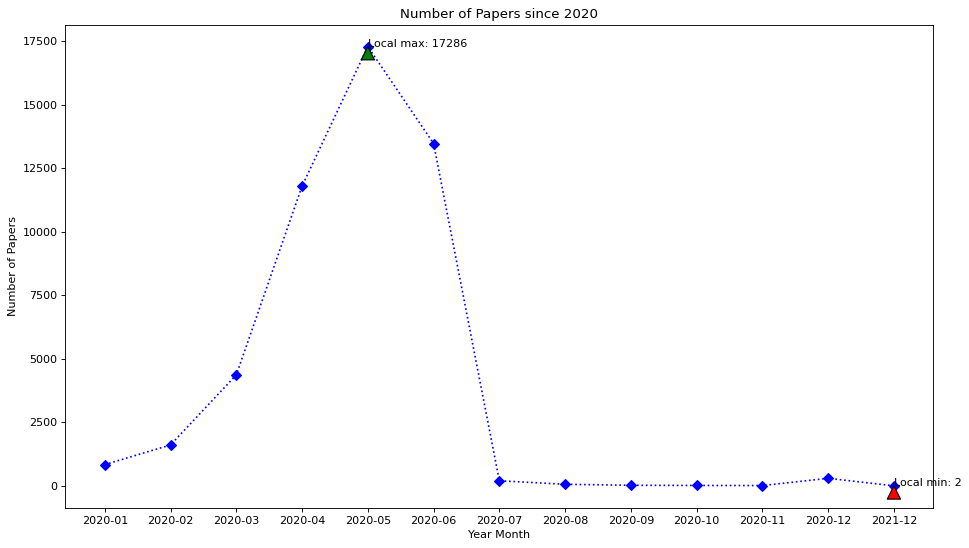

In [0]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(14, 8), dpi=80)

plt.plot(names, values, label="Number of Papers", marker = 'D', color='b', linestyle='dotted')

plt.annotate('Local max: ' + str(ymax), xy=(xmax, ymax), xytext=(xmax, ymax+5),
            arrowprops=dict(facecolor='green'),
            )

plt.annotate('Local min: ' + str(ymin), xy=(xmin, ymin), xytext=(xmin, ymin+5),
            arrowprops=dict(facecolor='red'),
            )

plt.xlabel('Year Month')
plt.ylabel('Number of Papers')
plt.title('Number of Papers since 2020')

plt.show()

#### 8.2 Using Bokeh to plot the datapoints

In [0]:
from bokeh.plotting import figure, output_file
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.embed import components, file_html
from bokeh.resources import CDN

# Defining X & Y points from the column values
x_pts = names
y_pts = values

# Creating the Data Dictionary for X & Y (tooltips)
data = {
"x": names,
"y": values
}

# Create a Figure() with necessary attributes
p = figure(x_range=names,
           plot_height=350,
           plot_width=1000,
           x_axis_label='Year Month', 
           y_axis_label='Number of Papers',
#            tools="hover",
           tooltips=None)

# To render the plot into a Line chart, we use a line() 
p.line(x_pts,
       y_pts, 
       legend_label="Number of Papers published", 
       line_width=2)

# To render markers where the datapoints are present
p.circle(names, values, width=5)

# To add HoverTool which would enable hovering across the vertical line & give tooltips
p.add_tools(HoverTool(
    tooltips=[
        ( 'Year Month',   '@x'),
        ( 'Num of Papers', '@y' ),
    ],

    # display a tooltip whenever the cursor is vertically in line with a glyph
    mode='vline'
))

# To configure visual properties on a plot's title attribute
p.title.text = "Number of Papers since 2020"
p.title.align = "center"
p.title.text_color = "black"
p.title.text_font_size = "25px"
p.title.background_fill_color = "#fafafa"

# To create an html document that embeds the Bokeh plot
html = file_html(p, CDN, "my plot1")

# To display this html
displayHTML(html)


<!DOCTYPE html>
 
 
 
 
 
 my plot1

### 9. Further Analysis

#### 9.1 Further Analysis 1 - Matplotlib & WordCloud to analyze the Abstracts from the latest 3 journals

In [0]:
# To create an RDD with Abstracts & Journal published date in descending order (Top 3)

rdd_fa_1 = cord19_rdd.filter(lambda row: row.publish_time is not None) \
                     .filter(lambda row: row.abstract is not None) \
                     .map(lambda row: (row.publish_time, row.abstract)) \
                     .filter(lambda line: line[0][4:5] == '-' and line[0][7:8] == '-') \
                     .filter(lambda line: line[1] != 'Unknown') \
                     .sortByKey(ascending=False)

rdd_fa_1.take(2)

Out[27]: [('2021-12-31',
 'Abstract: Respiratory viruses are commonly detected in both healthy and immunocompromised children. In most healthy children, respiratory viruses are associated with self-limited upper respiratory tract infections and are not accompanied by significant morbidity. In immunocompromised hosts, including hematopoietic cell transplant recipients, solid organ transplant recipients, and oncology patients, respiratory viruses can be associated with significant clinical manifestations, including prolonged viral shedding, lower respiratory tract disease, the need for supplemental oxygen, late airflow obstruction, and even death. This chapter reviews the major respiratory viruses, including respiratory syncytial virus, human metapneumovirus, influenza, parainfluenza viruses, human rhinoviruses, and human coronaviruses. Other viruses can manifest as pulmonary infection; however, these viruses are discussed elsewhere (see Chapter 17 for discussion of cytomegalovirus and Chapter 22 for discussion of adenoviruses).'),
 ('2020-12-31',
 'Given the rapid spread of the COVID-19 pandemic and the huge negative impacts it is causing, researching on COVID-19-related issues is very important for designing proactive and comprehensive public health interventions to fight against the pandemic. We describe the characteristics of COVID-19 patients detected in the two phases of the epidemic in Vietnam. Data used in this paper were mainly obtained from the official database of the Ministry of Health of Vietnam. Descriptive statistics were carried out using Stata 16 software. As of 18 May 2020, the cumulative number of COVID-19 cases detected in Vietnam was 324, 16 cases from 4 cities and provinces in the first phase (during 20 days, 0.8 cases detected per day) and 308 cases from 35 cities, provinces in the second phase (during 76 days, 4.1 cases detected per day). Vietnam has mobilized its entire political system to fight the COVID-19 and achieved some initial successes. We found both similarities and differences between the two phases of the COVID-19 epidemic in Vietnam. We demonstrated that the situation of the COVID-19 epidemic in Vietnam is getting more complicated and unpredictable.')]

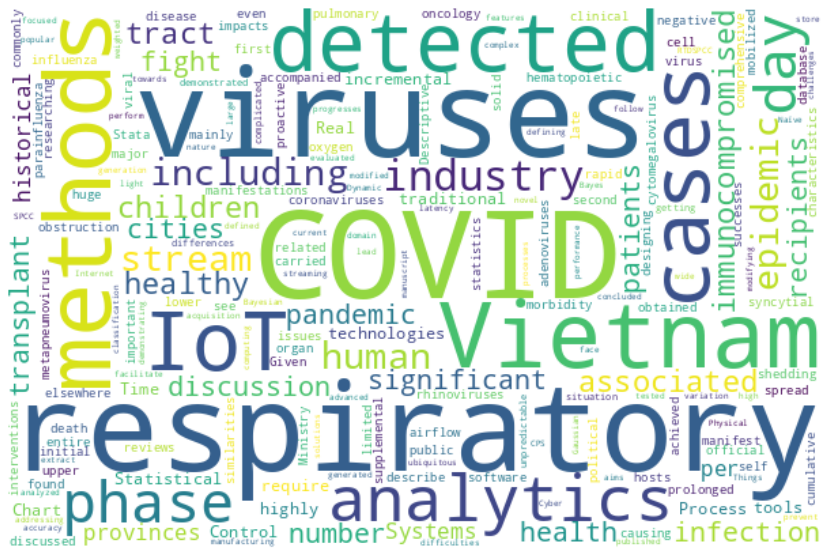

In [0]:
# Use the above created RDD in a word cloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import sys, os
os.chdir(sys.path[0])

# Read the top 3 abstracts into text as a "String"
text = str(rdd_fa_1.map(lambda line: line[1]).take(3))

extra_stopwds = ['use', 'used', 'using', 'different', 'Abstract', 'need', 'due', 'method', 'system', 'data', 'machine', 'machining', 'chapter', 'one', 'well', 'will', 'may', 'new', 'two', 'tool', 'based', 'paper', 'material']

stopwords = STOPWORDS.update(extra_stopwds)     

wc = WordCloud(background_color='white',
               stopwords=stopwords,
               height = 400,
               width=600)

wc.generate(text)

plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
task4_rdd.toDebugString().decode().splitlines()

Out[29]: ['(15) PythonRDD[729] at RDD at PythonRDD.scala:58 []',
 ' | MapPartitionsRDD[610] at mapPartitions at PythonRDD.scala:183 []',
 ' | ShuffledRDD[609] at partitionBy at NativeMethodAccessorImpl.java:0 []',
 ' +-(15) PairwiseRDD[608] at sortBy at <command-573720480383173>:14 []',
 ' | PythonRDD[607] at sortBy at <command-573720480383173>:14 []',
 ' | MapPartitionsRDD[538] at mapPartitions at PythonRDD.scala:183 []',
 ' | ShuffledRDD[537] at partitionBy at NativeMethodAccessorImpl.java:0 []',
 ' +-(16) PairwiseRDD[536] at reduceByKey at <command-573720480383173>:14 []',
 ' | PythonRDD[535] at reduceByKey at <command-573720480383173>:14 []',
 ' | MapPartitionsRDD[534] at mapPartitions at PythonRDD.scala:183 []',
 ' | ShuffledRDD[533] at partitionBy at NativeMethodAccessorImpl.java:0 []',
 ' +-(16) PairwiseRDD[532] at subtract at <command-573720480383173>:14 []',
 ' | PythonRDD[531] at subtract at <command-573720480383173>:14 []',
 ' | UnionRDD[530] at union at NativeMethodAccessorImpl.java:0 []',
 ' | PythonRDD[528] at RDD at PythonRDD.scala:58 []',
 ' | PythonRDD[527] at RDD at PythonRDD.scala:58 []',
 ' | CachedPartitions: 8; MemorySize: 12.4 MiB; DiskSize: 0.0 B',
 ' | MapPartitionsRDD[418] at javaToPython at NativeMethodAccessorImpl.java:0 []',
 ' | MapPartitionsRDD[417] at javaToPython at NativeMethodAccessorImpl.java:0 []',
 ' | SQLExecutionRDD[416] at javaToPython at NativeMethodAccessorImpl.java:0 []',
 ' | MapPartitionsRDD[415] at javaToPython at NativeMethodAccessorImpl.java:0 []',
 ' | FileScanRDD[414] at javaToPython at NativeMethodAccessorImpl.java:0 []',
 ' | PythonRDD[529] at RDD at PythonRDD.scala:58 []',
 ' | PythonRDD[526] at RDD at PythonRDD.scala:58 []',
 ' | CachedPartitions: 8; MemorySize: 598.0 B; DiskSize: 0.0 B',
 ' | MapPartitionsRDD[418] at javaToPython at NativeMethodAccessorImpl.java:0 []',
 ' | MapPartitionsRDD[417] at javaToPython at NativeMethodAccessorImpl.java:0 []',
 ' | SQLExecutionRDD[416] at javaToPython at NativeMethodAccessorImpl.java:0 []',
 ' | MapPartitionsRDD[415] at javaToPython at NativeMethodAccessorImpl.java:0 []',
 ' | FileScanRDD[414] at javaToPython at NativeMethodAccessorImpl.java:0 []']

In [0]:
task5_rdd.toDebugString().decode().splitlines()

Out[30]: ['(10) PythonRDD[730] at RDD at PythonRDD.scala:58 []',
 ' | MapPartitionsRDD[673] at mapPartitions at PythonRDD.scala:183 []',
 ' | ShuffledRDD[672] at partitionBy at NativeMethodAccessorImpl.java:0 []',
 ' +-(10) PairwiseRDD[671] at sortBy at <command-2853183297691199>:11 []',
 ' | PythonRDD[670] at sortBy at <command-2853183297691199>:11 []',
 ' | MapPartitionsRDD[628] at mapPartitions at PythonRDD.scala:183 []',
 ' | ShuffledRDD[627] at partitionBy at NativeMethodAccessorImpl.java:0 []',
 ' +-(10) PairwiseRDD[626] at groupByKey at <command-2853183297691199>:11 []',
 ' | PythonRDD[625] at groupByKey at <command-2853183297691199>:11 []',
 ' | MapPartitionsRDD[624] at mapPartitions at PythonRDD.scala:183 []',
 ' | ShuffledRDD[623] at partitionBy at NativeMethodAccessorImpl.java:0 []',
 ' +-(10) PairwiseRDD[622] at join at <command-2853183297691199>:11 []',
 ' | PythonRDD[621] at join at <command-2853183297691199>:11 []',
 ' | UnionRDD[620] at union at NativeMethodAccessorImpl.java:0 []',
 ' | PythonRDD[618] at RDD at PythonRDD.scala:58 []',
 ' | PythonRDD[616] at RDD at PythonRDD.scala:58 []',
 ' | CachedPartitions: 8; MemorySize: 13.0 MiB; DiskSize: 0.0 B',
 ' | MapPartitionsRDD[418] at javaToPython at NativeMethodAccessorImpl.java:0 []',
 ' | MapPartitionsRDD[417] at javaToPython at NativeMethodAccessorImpl.java:0 []',
 ' | SQLExecutionRDD[416] at javaToPython at NativeMethodAccessorImpl.java:0 []',
 ' | MapPartitionsRDD[415] at javaToPython at NativeMethodAccessorImpl.java:0 []',
 ' | FileScanRDD[414] at javaToPython at NativeMethodAccessorImpl.java:0 []',
 ' | PythonRDD[619] at RDD at PythonRDD.scala:58 []',
 ' | PythonRDD[617] at RDD at PythonRDD.scala:58 []',
 ' | CachedPartitions: 2; MemorySize: 742.9 KiB; DiskSize: 0.0 B',
 ' | MapPartitionsRDD[445] at javaToPython at NativeMethodAccessorImpl.java:0 []',
 ' | MapPartitionsRDD[444] at javaToPython at NativeMethodAccessorImpl.java:0 []',
 ' | SQLExecutionRDD[443] at javaToPython at NativeMethodAccessorImpl.java:0 []',
 ' | MapPartitionsRDD[442] at javaToPython at NativeMethodAccessorImpl.java:0 []',
 ' | FileScanRDD[441] at javaToPython at NativeMethodAccessorImpl.java:0 []']

In [0]:
# # Unpersist all tasks 

# Check for common persistence and apply hybrid rdd which is used for both tasks / even 3

# task1_rdd.unpersist()
# task2_rdd.unpersist()
# task3_rdd.unpersist()
# task4_rdd.unpersist()
# task5_rdd.unpersist()
# task6_rdd.unpersist()